<a href="https://colab.research.google.com/github/amandafriedmann/NEUR-Data-Analysis/blob/main/FINAL_PROJECT_WORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Atherosclerosis data

In [2]:
#import all of my packages
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import pearsonr

In [3]:
#create my variables(one for each data set) and get the shape
atherosclerosis_data = pd.read_csv('https://raw.githubusercontent.com/amandafriedmann/NEUR-Data-Analysis/main/ATHERO%20REAL%20DATA.csv')
microinfarcts_data = pd.read_csv('https://raw.githubusercontent.com/amandafriedmann/NEUR-Data-Analysis/main/MICRO%20REAL%20DATA%20V2.csv')
print(atherosclerosis_data.shape)
print(microinfarcts_data.shape)
print(atherosclerosis_data)
print(microinfarcts_data)

(84, 3)
(84, 3)
   Atherosclerosis  number of Hematoxylin positive nuclei_Grey matter  \
0             Mild                                             140399   
1             Mild                                              86781   
2         Moderate                                             117450   
3             Mild                                              47069   
4             Mild                                              58939   
..             ...                                                ...   
79        Moderate                                              45037   
80            Mild                                              77976   
81        Moderate                                              85695   
82            Mild                                              93682   
83        Moderate                                              91856   

    average Hematoxylin positive nucleus area_Grey matter  
0                                           27.

<Axes: ylabel='Atherosclerosis'>

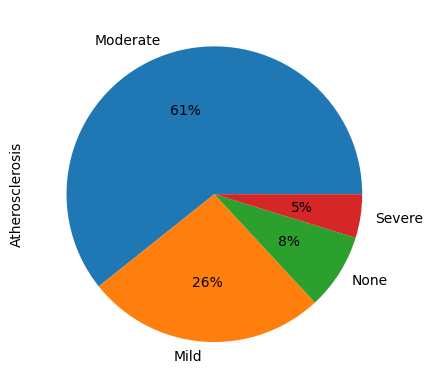

In [3]:
#Atherosclerosis grouping variable distribution as a pie chart
atherosclerosis_data['Atherosclerosis'].value_counts().plot(kind='pie',autopct='%1.0f%%')

*Figure 1*: This figure shows the distribution of groups for the variable Atherosclerosis, or rather, Atherosclerosis severity in participants. Moderate and Mild cases made up the majority of the data, making up 61 and 26 percent respectively. Severe cases of Atherosclerosis made up 5% of the data, and the rest was accounted for by patients without diagnosed Atherosclerosis (8%). 

Text(0, 0.5, 'Frequency')

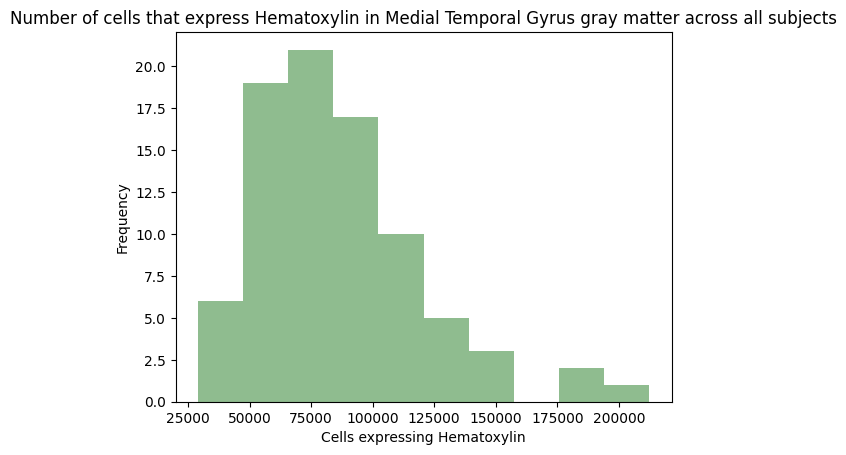

In [4]:
#Atherosclerosis dependent variable 1 (number of Hematoxylin positive nuclei_Grey matter) distribution
atherosclerosis_data['number of Hematoxylin positive nuclei_Grey matter'].plot(kind='hist', color = 'darkseagreen')
plt.title('Number of cells that express Hematoxylin in Medial Temporal Gyrus gray matter across all subjects')
plt.xlabel('Cells expressing Hematoxylin')
plt.ylabel('Frequency')

*Figure 2*: This graph shows the distribution of Hematoxylin expressing cells in the MTG gray matter across all subjects with varying Atherosclerosis severity levels. A skewness test for this data showed a skewness statistic of 4.14 and a p-value of 3.42x10^-5, indicating an extremely skewed distribution. This graph shows how most of the subjects have between 75,000 and 100,000 Hematoxylin expressing cells, however there is a large range in this data. 

In [5]:
#skewness test for dependent variable one
stats.skewtest(atherosclerosis_data['number of Hematoxylin positive nuclei_Grey matter'])

SkewtestResult(statistic=4.143782498486064, pvalue=3.4162377276131725e-05)

Text(0, 0.5, 'Frequency')

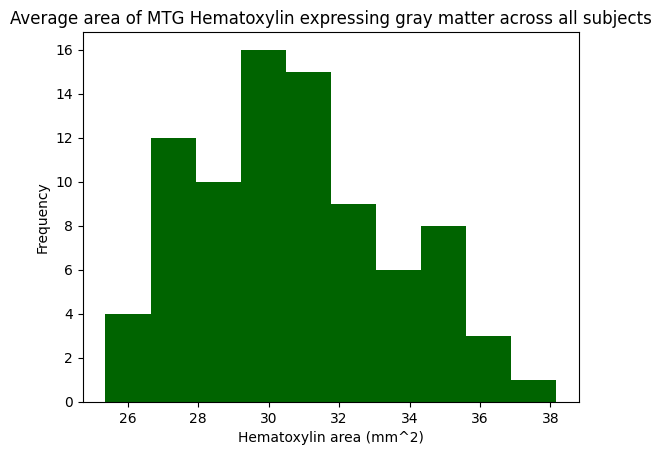

In [6]:
#Atherosclerosis dependent variable 2 (average Hematoxylin positive nucleus area_Grey matter) distribution
atherosclerosis_data['average Hematoxylin positive nucleus area_Grey matter'].plot(kind='hist', color = 'darkgreen')
plt.title('Average area of MTG Hematoxylin expressing gray matter across all subjects')
plt.xlabel('Hematoxylin area (mm^2)')
plt.ylabel('Frequency')

*Figure 3*: This graph shows the distribution of the average area of the MTG gray matter in which Hematoxylin is expressed across all subjects with varying Atherosclerosis severity levels. A skewness test for this data showed a skewness statistic of 1.48 and a p-value of 0.14, indicating a very skewed distribution. This graph shows how most of the subjects have between 29 and 32 mm^2 area expressing Hematoxylin in this part of the brain. 

In [7]:
#skewness test dependent variable two
stats.skewtest(atherosclerosis_data['average Hematoxylin positive nucleus area_Grey matter'])
#not skewed!

SkewtestResult(statistic=1.4778314043179388, pvalue=0.13945291038467258)

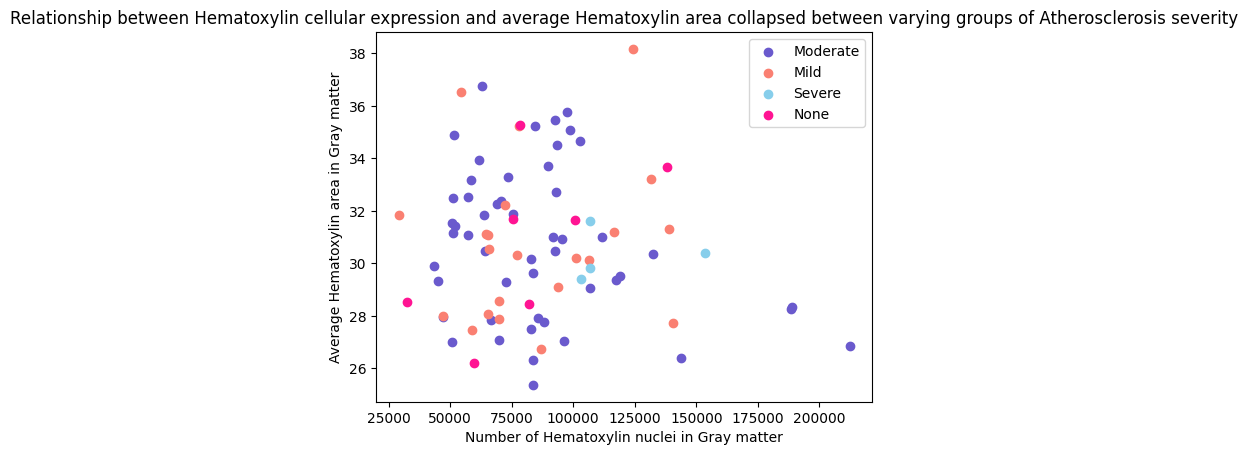

In [4]:
#scatterplot of dependent variables across Atherosclerosis groups
moderate_df = atherosclerosis_data[atherosclerosis_data['Atherosclerosis'] == 'Moderate']
mild_df = atherosclerosis_data[atherosclerosis_data['Atherosclerosis'] == 'Mild']
severe_df = atherosclerosis_data[atherosclerosis_data['Atherosclerosis'] == 'Severe']
none_df = atherosclerosis_data[atherosclerosis_data['Atherosclerosis'] == 'None']

plt.scatter(moderate_df['number of Hematoxylin positive nuclei_Grey matter'],moderate_df['average Hematoxylin positive nucleus area_Grey matter'], color = "slateblue")
plt.scatter(mild_df['number of Hematoxylin positive nuclei_Grey matter'],mild_df['average Hematoxylin positive nucleus area_Grey matter'], color = "salmon")
plt.scatter(severe_df['number of Hematoxylin positive nuclei_Grey matter'],severe_df['average Hematoxylin positive nucleus area_Grey matter'], color = "skyblue")
plt.scatter(none_df['number of Hematoxylin positive nuclei_Grey matter'],none_df['average Hematoxylin positive nucleus area_Grey matter'], color = "deeppink")

plt.xlabel('Number of Hematoxylin nuclei in Gray matter')
plt.ylabel('Average Hematoxylin area in Gray matter')
plt.title('Relationship between Hematoxylin cellular expression and average Hematoxylin area collapsed between varying groups of Atherosclerosis severity')
plt.legend(['Moderate','Mild','Severe', 'None'])

*Figure 4*: This figure describes the correlational relationship between the number of cells expressing Hematoxylin and the average area of the MTG gray matter expressing Hematoxylin across the various levels of Atherosclerosis severity. It is clear that all of the grouping variables are spread out somewhat randomly across the graph, indicating little difference based on grouping variable. After running a pearsonr correlational test, this conclusion is supported, since there is an r statistic of -0.10 and a p-value of 0.37, indicating a very weak correlation between the two dependent variables. 

In [9]:
#find correlation between DV1 (number hema) and DV2 (average hema area)
pearsonr(atherosclerosis_data['number of Hematoxylin positive nuclei_Grey matter'], atherosclerosis_data['average Hematoxylin positive nucleus area_Grey matter'])

PearsonRResult(statistic=-0.09908903287175093, pvalue=0.3698428315733075)

**Interpret Correlation**

Text(0.5, 1.0, 'Number of Hematoxylin expressing cells dependent on Atherosclerosis severity')

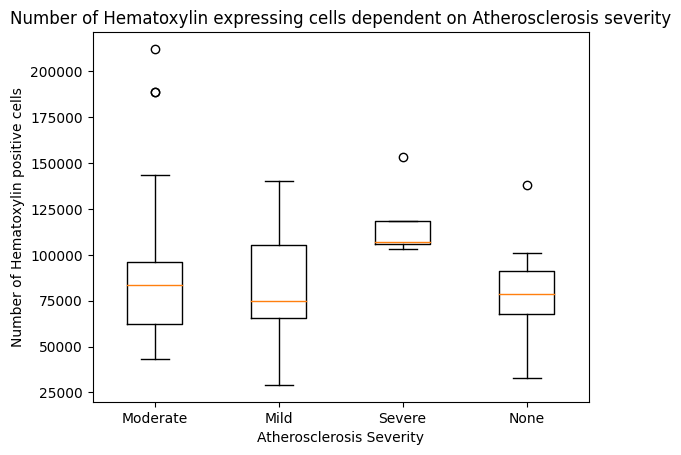

In [7]:
#boxplot for number of Hematoxylin positive nuclei_Grey matter across different Atherosclerosis groups

moderate_number = moderate_df['number of Hematoxylin positive nuclei_Grey matter']
mild_number = mild_df['number of Hematoxylin positive nuclei_Grey matter']
severe_number = severe_df['number of Hematoxylin positive nuclei_Grey matter']
none_number = none_df['number of Hematoxylin positive nuclei_Grey matter']
data = [moderate_number.tolist(), mild_number.tolist(), severe_number.tolist(), none_number.tolist()]
plt.boxplot(data)
plt.xlabel('Atherosclerosis Severity')
plt.ylabel('Number of Hematoxylin positive cells')
plt.xticks([1,2,3,4],['Moderate', 'Mild', 'Severe', 'None'])
plt.title('Number of Hematoxylin expressing cells dependent on Atherosclerosis severity')

*Figure 5*: This boxplot shows how the number of Hematoxylin positive cells varies between each level of Atherosclerosis severity. This graph does not show much variation between each level of the independent variable, and that is supported by the results of the one-way ANOVA conducted to determine if there was any significant difference between number of Hematoxylin positive cells between any of the groups, which showed an F-value of 1.19 and a p-value of 0.32, indicating nonsignificant relationships between the independent and dependent variables. 

Text(0.5, 1.0, 'Average Hematoxylin positive area dependent on Atherosclerosis severity')

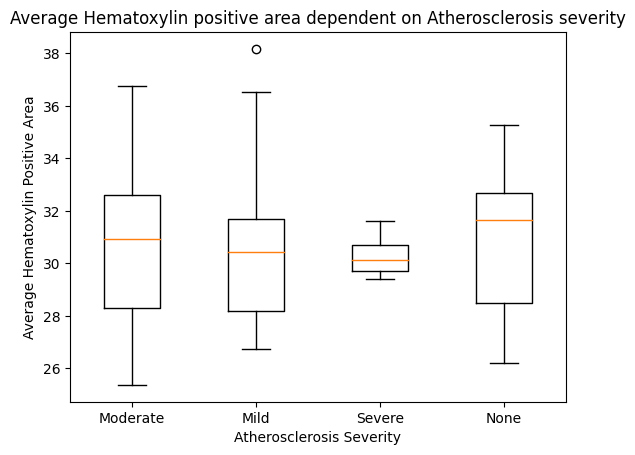

In [8]:
#boxplot for average Hematoxylin positive nucleus area_Grey matter across different Atherosclerosis groups

moderate_number = moderate_df['average Hematoxylin positive nucleus area_Grey matter']
mild_number = mild_df['average Hematoxylin positive nucleus area_Grey matter']
severe_number = severe_df['average Hematoxylin positive nucleus area_Grey matter']
none_number = none_df['average Hematoxylin positive nucleus area_Grey matter']
data = [moderate_number.tolist(), mild_number.tolist(), severe_number.tolist(), none_number.tolist()]
plt.boxplot(data)
plt.xlabel('Atherosclerosis Severity')
plt.ylabel('Average Hematoxylin Positive Area')
plt.xticks([1,2,3,4],['Moderate', 'Mild', 'Severe', 'None'])
plt.title('Average Hematoxylin positive area dependent on Atherosclerosis severity')

*Figure 6*: This boxplot shows how the average area of Hematoxylin positive cells varies between each level of Atherosclerosis severity. This graph does not show much variation between each level of the independent variable, and that is supported by the results of the one-way ANOVA conducted to determine if there was any significant difference between average area of Hematoxylin positive cells between any of the groups, which showed an F-value of 0.03 and a p-value of 0.99, indicating nonsignificant relationships between the independent and dependent variables. 

In [20]:
#one way anova DV1 (number hema)
stats.f_oneway(atherosclerosis_data['number of Hematoxylin positive nuclei_Grey matter'][atherosclerosis_data['Atherosclerosis'] == 'Mild'],
atherosclerosis_data['number of Hematoxylin positive nuclei_Grey matter'][atherosclerosis_data['Atherosclerosis'] == 'Moderate'],
atherosclerosis_data['number of Hematoxylin positive nuclei_Grey matter'][atherosclerosis_data['Atherosclerosis'] == 'Severe'],
atherosclerosis_data['number of Hematoxylin positive nuclei_Grey matter'][atherosclerosis_data['Atherosclerosis'] == 'None'])

F_onewayResult(statistic=1.1878415878884105, pvalue=0.3197212419244643)

In [19]:
#one way anova DV2 (area hema)
stats.f_oneway(atherosclerosis_data['average Hematoxylin positive nucleus area_Grey matter'][atherosclerosis_data['Atherosclerosis'] == 'Mild'],
atherosclerosis_data['average Hematoxylin positive nucleus area_Grey matter'][atherosclerosis_data['Atherosclerosis'] == 'Moderate'],
atherosclerosis_data['average Hematoxylin positive nucleus area_Grey matter'][atherosclerosis_data['Atherosclerosis'] == 'Severe'],
atherosclerosis_data['average Hematoxylin positive nucleus area_Grey matter'][atherosclerosis_data['Atherosclerosis'] == 'None'])

F_onewayResult(statistic=0.032250700253854896, pvalue=0.99216007181403)

<Axes: ylabel='Total Microinfarcts (not observed grossly)'>

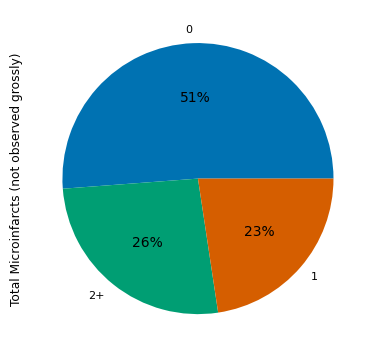

In [22]:
#Total Microinfarcts grouping variable distribution
microinfarcts_data['Total Microinfarcts (not observed grossly)'].value_counts().plot(kind='pie',autopct='%1.0f%%')

Text(0, 0.5, 'Frequency')

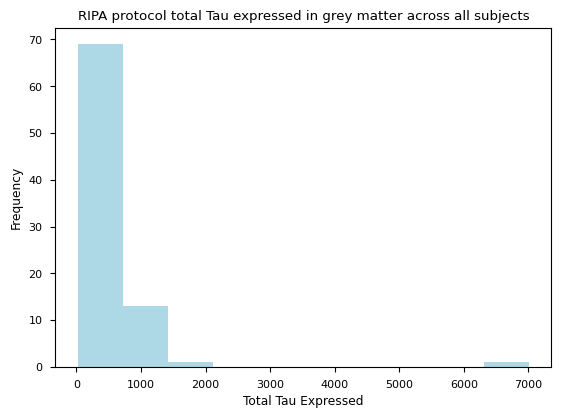

In [11]:
#Total Microinfarcts dependent variable 1 (ripa tTau_Grey matter) distribution
microinfarcts_data['ripa tTau_Grey matter'].plot(kind='hist', color = 'lightblue')
plt.title('RIPA protocol total Tau expressed in grey matter across all subjects')
plt.xlabel('Total Tau Expressed')
plt.ylabel('Frequency')

In [38]:
#skewness test for dependent variable one
stats.skewtest(microinfarcts_data['ripa tTau_Grey matter'])

SkewtestResult(statistic=10.125078615999781, pvalue=4.276349448984497e-24)

Text(0, 0.5, 'Frequency')

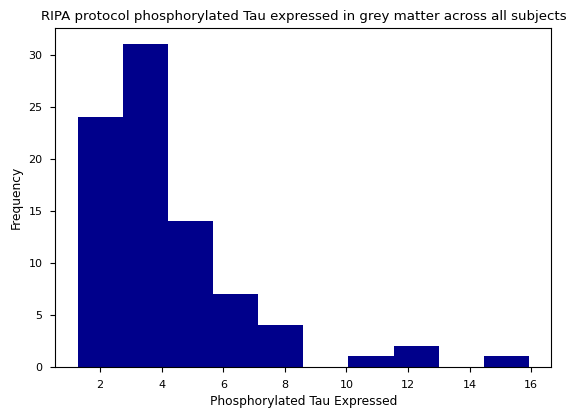

In [12]:
#Total Microinfarcts dependent variable 2 (ripa pTau_Grey matter) distribution
microinfarcts_data['ripa pTau_Grey matter'].plot(kind='hist', color = 'darkblue')
plt.title('RIPA protocol phosphorylated Tau expressed in grey matter across all subjects')
plt.xlabel('Phosphorylated Tau Expressed')
plt.ylabel('Frequency')

In [37]:
#skewness test dependent variable two
stats.skewtest(microinfarcts_data['ripa pTau_Grey matter'])

SkewtestResult(statistic=5.920714568009881, pvalue=3.2054577666964234e-09)

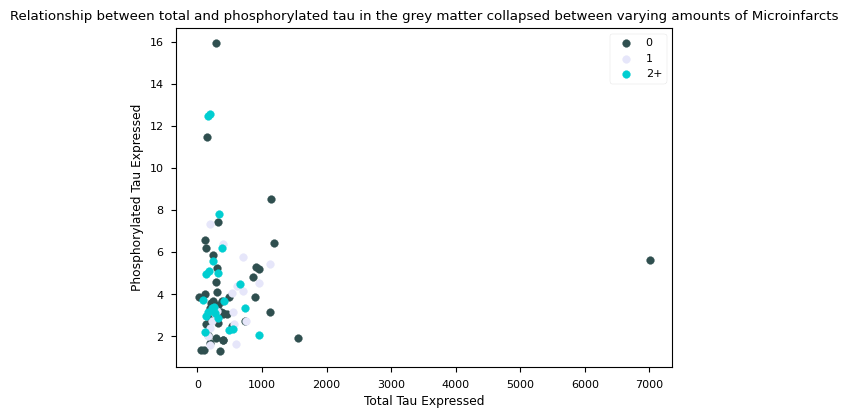

In [13]:
#scatterplot of dependent variables across Microinfarcts groups
zero_df = microinfarcts_data[microinfarcts_data['Total Microinfarcts (not observed grossly)'] == '0']
one_df = microinfarcts_data[microinfarcts_data['Total Microinfarcts (not observed grossly)'] == '1']
twoplus_df = microinfarcts_data[microinfarcts_data['Total Microinfarcts (not observed grossly)'] == '2+']

plt.scatter(zero_df['ripa tTau_Grey matter'],zero_df['ripa pTau_Grey matter'], color = "darkslategray")
plt.scatter(one_df['ripa tTau_Grey matter'],one_df['ripa pTau_Grey matter'], color = "lavender")
plt.scatter(twoplus_df['ripa tTau_Grey matter'],twoplus_df['ripa pTau_Grey matter'], color = "darkturquoise")


plt.xlabel('Total Tau Expressed')
plt.ylabel('Phosphorylated Tau Expressed')
plt.title('Relationship between total and phosphorylated tau in the grey matter collapsed between varying amounts of Microinfarcts')
plt.legend(['0','1','2+'])

In [41]:
#find correlation between tTau and pTau
pearsonr(microinfarcts_data['ripa tTau_Grey matter'], microinfarcts_data['ripa pTau_Grey matter'])

PearsonRResult(statistic=0.04593856626820792, pvalue=0.6781826166807816)

**Interpret Correlation**

<ipython-input-28-7ece7c1bf9a6>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


Text(0.5, 1.0, 'Amount of tTau expressed in grey matter dependent on amount of Microinfarcts')

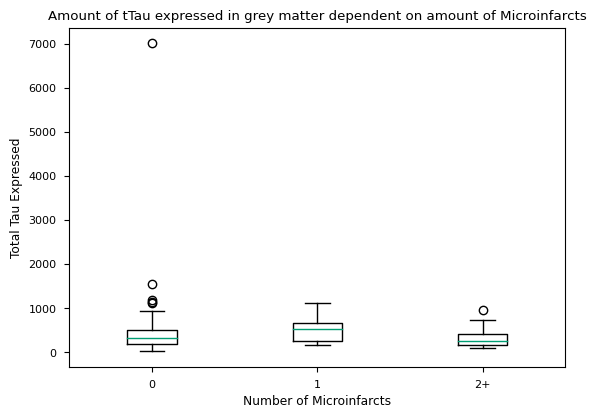

In [28]:
#boxplot for tTau expression across different Microinfarcts groups

zero_number = zero_df['ripa tTau_Grey matter']
one_number = one_df['ripa tTau_Grey matter']
twoplus_number = twoplus_df['ripa tTau_Grey matter']

data = [zero_number.tolist(), one_number.tolist(), twoplus_number.tolist()]
plt.boxplot(data)
plt.xlabel('Number of Microinfarcts')
plt.ylabel('Total Tau Expressed')
plt.xticks([1,2,3],['0', '1', '2+'])
plt.style.use('seaborn-paper')
plt.title('Amount of tTau expressed in grey matter dependent on amount of Microinfarcts')

Text(0.5, 1.0, 'Amount of pTau expressed in grey matter dependent on amount of Microinfarcts')

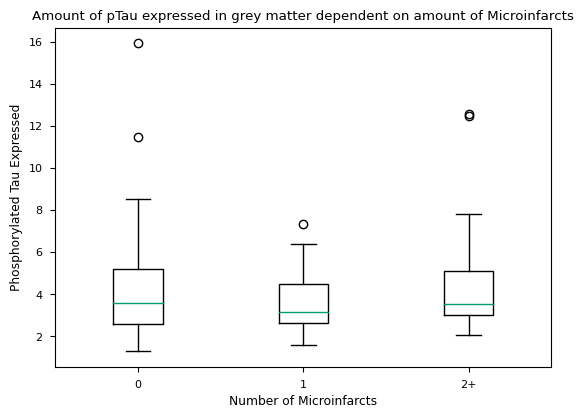

In [29]:
#boxplot for pTau expression across different groups

zero_number = zero_df['ripa pTau_Grey matter']
one_number = one_df['ripa pTau_Grey matter']
twoplus_number = twoplus_df['ripa pTau_Grey matter']

data = [zero_number.tolist(), one_number.tolist(), twoplus_number.tolist()]
plt.boxplot(data)
plt.xlabel('Number of Microinfarcts')
plt.ylabel('Phosphorylated Tau Expressed')
plt.xticks([1,2,3],['0', '1', '2+'])
plt.title('Amount of pTau expressed in grey matter dependent on amount of Microinfarcts')

In [18]:
#one way ANOVA tTau
stats.f_oneway(microinfarcts_data['ripa tTau_Grey matter'][microinfarcts_data['Total Microinfarcts (not observed grossly)'] == '0'],
microinfarcts_data['ripa tTau_Grey matter'][microinfarcts_data['Total Microinfarcts (not observed grossly)'] == '1'],
microinfarcts_data['ripa tTau_Grey matter'][microinfarcts_data['Total Microinfarcts (not observed grossly)'] == '2+'])

F_onewayResult(statistic=0.7513789871294282, pvalue=0.47497457244839636)

In [21]:
#one way ANOVA pTau
stats.f_oneway(microinfarcts_data['ripa pTau_Grey matter'][microinfarcts_data['Total Microinfarcts (not observed grossly)'] == '0'],
microinfarcts_data['ripa pTau_Grey matter'][microinfarcts_data['Total Microinfarcts (not observed grossly)'] == '1'],
microinfarcts_data['ripa pTau_Grey matter'][microinfarcts_data['Total Microinfarcts (not observed grossly)'] == '2+'])

F_onewayResult(statistic=0.7135424267573609, pvalue=0.49295884830459713)

**Questions?**
- How would I get the amount of counts from each pie chart, and are the pie charts showing what they are supposed to?
- How do I change the boxplot colors?
- How would you show whether the correlation differs by group?